In [8]:
from pathlib import Path
import os

import numpy as np
import matplotlib.pyplot as plt

from hazma import decay
import utils
from utils import MK0, MPI, MPI0

In [2]:
# =========================================================
# ---- K-Short Branching Ratios ---------------------------
# =========================================================

# BR(π+, π−) = (69.20±0.05) %
BR_KS_TO_PI_PI = 69.20e-2 
# BR(π0, π0) = (30.69±0.05) %
BR_KS_TO_PI0_PI0 = 30.69e-2

# BR(π+, π−, γ) = ( 1.79±0.05)×10−3
BR_KS_TO_PI_PI_A = 1.79e-3
# BR(π±, e∓, νe) =  ( 7.04±0.08)×10−4
BR_KS_TO_PI_E_NUE = 7.04e-4
# BR(π+, π−, e+, e−) = ( 4.79±0.15)×10−5
BR_KS_TO_PI_PI_E_E = 4.79e-5
# BR(γ, γ) = ( 2.63±0.17)×10−6
BR_KS_TO_A_A = 2.63e-6
# BR(π+, π−, π0) = ( 3.5+1.1−0.9)×10−7
BR_KS_TO_PI_PI_PI0 = 3.5e-7
# BR(π0, γ, γ) =  ( 4.9±1.8 )×10−8
BR_KS_TO_PI0_A_A = 4.9e-8
# BR(π0, e+, e−) = ( 3.0+1.5−1.2)×10−9
BR_KS_TO_PI0_E_E = 3e-9
# BR(π0, μ+, μ−) = ( 2.9+1.5−1.2)×10−9
BR_KS_TO_PI0_MU_MU = 2.9e-9

In [5]:
class ShortKaonSpectra:
    def __init__(self):
        pass

    def dnde_photon_pi_pi(self, e):
        epi = utils.energy_one_cme(MK0, MPI, MPI)
        dec = 2 * decay.charged_pion(e, epi)
        fsr = utils.dnde_photon_fsr_scalar(e, MK0**2, MPI, q=1.0)
        return dec + fsr

    def dnde_photon_pi0_pi0(self, e):
        epi = utils.energy_one_cme(MK0, MPI0, MPI0)
        return 2 * decay.neutral_pion(e, epi)

    def dnde_photon(self, e, components=False):
        pi_pi = self.dnde_photon_pi_pi(e)
        pi0_pi0 = self.dnde_photon_pi0_pi0(e)
        if components:
            return {
                "pi pi": pi_pi,
                "pi0 pi0": pi0_pi0,
            }
        return pi0_pi0 + pi_pi

/home/logan/github/Hazma/notebooks/decay_spectra/utils.py:63: RuntimeWarning: invalid value encountered in log
  np.e * m ** 2 / s > xm, 0.0, 2.0 * xm / x * (np.log(s * xm / m ** 2) - 1.0)


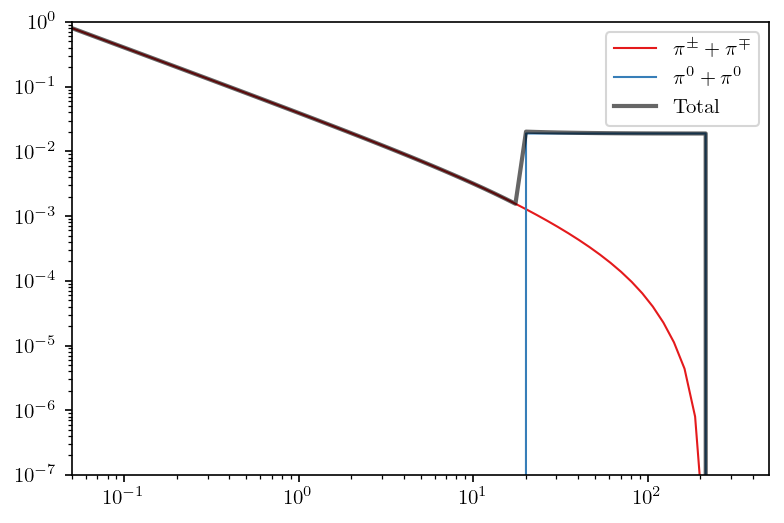

In [6]:
labels = {
    "pi0 pi0" : r"$\pi^{0} + \pi^{0}$",
    "pi pi" : r"$\pi^{\pm} + \pi^{\mp}$",
    "total": r"$\mathrm{Total}$"
}

plot_params = {
    "pi pi" : {"c": utils.qualitative[0], "lw": 1},
    "pi0 pi0" : {"c": utils.qualitative[1], "lw": 1},
    "total": {"c": "k", "lw": 2, "alpha": 0.6},
}

es = MK0 * np.geomspace(1e-6, 1.0, 100)
dnde_k = ShortKaonSpectra().dnde_photon(es, components=True)

plt.figure(dpi=150)

for key, val in dnde_k.items():
    plt.plot(es, val, label=labels[key], **plot_params[key])
plt.plot(es, sum(dnde_k.values()), label=labels["total"], **plot_params["total"])



plt.ylim(1e-7, 1e0)
plt.xlim(np.max(es) * 1e-4, np.max(es))
plt.yscale("log")
plt.xscale("log")
plt.legend()

In [9]:
es = MK0 * np.geomspace(1e-6, 1.0, 500)
dnde_ks = sum(ShortKaonSpectra().dnde_photon(es, components=True).values())

s = slice(0, np.argwhere(dnde_ks <= 0)[0,0])
data = np.array([es[s], dnde_ks[s]]).T

np.savetxt(Path(os.getcwd()).joinpath("data").joinpath("ks_dnde_photon.csv"), data, delimiter=",", header="energy, dnde")

/home/logan/github/Hazma/notebooks/decay_spectra/utils.py:63: RuntimeWarning: invalid value encountered in log
  np.e * m ** 2 / s > xm, 0.0, 2.0 * xm / x * (np.log(s * xm / m ** 2) - 1.0)
